<a href="https://colab.research.google.com/github/FireDragon00/TAG_model/blob/main/%E8%AE%BA%E6%96%87%E5%AE%9E%E9%AA%8C_DIFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [2]:
!pip install pandas
!pip install torch
!pip install dgl

     |████████████████████████████████| 4.4 MB 27.0 MB/s 


In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn import model_selection
from IPython.display import display, HTML
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# 初始化参数

In [4]:
root_path = '/content/drive/MyDrive/researchHub/MAppGraph/mappgraph/data'

In [5]:
N = 20
t = 10
k = 10  # the number of rows for the output tensor (k = 10, 20)
T = 5
overlap = 3 # note: overlap depends on T

apps = ['diijam', 'baomoi', 'fptplay', 'iQIYI', 'bigo', 'myradio', 'spotify', 'nhaccuatui', 'soundcloud', 'sachnoiapp', 
        'phim247', 'popskid', 'truyenaudiosachnoiviet', 'vieon', 'voizfm', 'tunefm', 'wetv', 'zingmp3', 'truyenaudio', 'baohay24h',
        'freefire', 'among_us', 'azar', 'comico', 'nimotv', 'mangatoon', 'medoctruyen', 'nhacvang', 'noveltoon', 'radiofm',
        'vtvgo', 'tivi24h', 'tinder', 'tinmoi24h', 'tivi360', 'tiktok', 'linkedin', 'tiki', 'tinhte', 'lotus', 'tivi247',
        'tivi_truyentranh_webtoon', 'tuoitre_online', 'vietnamworks', 'wallstreet_journal', 'cnn_news', 'bbc_news', 'twitter', 
        'weeboo', 'twitch', 'vnexpress', 'topcv', 'toc_chien', 'wesing', 'hago', 'google_meet', 'dubsmash', 'facebook','hahalolo', 
        'zalo', 'hello_yo', 'dan_tri', 'zoom', 'wikipedia', 'instagram', 'jobway', 'kaka', 'pinterest', 'quora', 'lazada', 'chess', 
        'cake', 'mobile_legend', 'co_tuong_online', 'ted', 'telegram', 'starmarker', 'skype', 'soha', 'tango', 'thanhnien', 'snapchat', 
        'tien_len', 'animal_restaurant', 'bida', 'cho_tot', 'messenger', 'netflix', 'nonolive', 'may', 'podcast_player', 'pubg', 
        'partying', 'kenh14', 'lienquan_mobile', 'likee_lite', 'reddit', 'sendo', 'shopee', 'the_guardian', 'ola_party']

SAME = ['zingmp3', 'fptplay', 'baomoi', 'nimotv', 'messenger', 'tiki', 'facebook', 'lienquan_mobile', 'quora', 'among_us', 'azar', 'tiktok', 'medoctruyen', 'weeboo', 'tinder', 'hago', 'bida']

features = ['complete_max', 'complete_min', 'complete_mean', 'complete_mad', 'complete_std', 'complete_var', 'complete_skew',
       'complete_kurt', 'complete_pkt_num', 'complete_10per', 'complete_20per', 'complete_30per', 'complete_40per', 'complete_50per', 
        'complete_60per', 'complete_70per', 'complete_80per', 'complete_90per', 'out_max', 'out_min', 'out_mean', 'out_mad', 'out_std',
        'out_var', 'out_skew', 'out_kurt', 'out_pkt_num', 'out_10per', 'out_20per', 'out_30per', 'out_40per', 'out_50per', 'out_60per',
        'out_70per', 'out_80per', 'out_90per', 'in_max', 'in_min', 'in_mean', 'in_mad', 'in_std', 'in_var', 'in_skew', 'in_kurt', 
        'in_pkt_num', 'in_10per', 'in_20per', 'in_30per', 'in_40per', 'in_50per', 'in_60per', 'in_70per', 'in_80per', 'in_90per', 
        'protocol', 'flows_num', 'flow_length_mean', 'flow_pkt_num_mean', 'flow_duration_mean', 'ip1', 'ip2', 'ip3', 'ip4'
       ]

In [6]:
print(len(SAME))

17


In [7]:
from dgl.data.utils import load_graphs

train_graphs, train_graph_labels_dict = load_graphs('/content/drive/MyDrive/train_graphs.bin')
train_graph_labels = train_graph_labels_dict['labels']
test_graphs, test_graph_labels_dict = load_graphs('/content/drive/MyDrive/test_graphs.bin')
test_graph_labels = test_graph_labels_dict['labels']


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


In [8]:
apps_dict={}

for i, name in enumerate(apps):
  apps_dict[name] = i

num_label=[]
for app in SAME:
  num_label.append(apps_dict[app])

new_train_g = []
new_train_l = []
for label, graph in zip(train_graph_labels, train_graphs):
  if label in num_label:
    new_train_g.append(graph)
    new_train_l.append(label)

print(len(new_train_g))
print(len(new_train_l))
print(new_train_l[0])

11782
11782
tensor(1)


In [9]:
apps_dict_iname = {}
for i, name in enumerate(apps):
  apps_dict_iname[i] = name

x = []
for l in new_train_l:
  x.append(l.item())
print(x)

SAME_dict={}
for i, name in enumerate(SAME):
  SAME_dict[name] = i

print(SAME_dict)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [10]:
import torch

app_name = []
for l in x:
  app_name.append(apps_dict_iname[l])
print(app_name)

SAME_labels = []
for name in app_name:
  SAME_labels.append(SAME_dict[name])
# set(SAME_labels)
new_train_l = torch.tensor(SAME_labels[:11700])
new_train_g = new_train_g[:11700]

['baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi', 'baomoi',

In [11]:
from dgl.data import DGLDataset
from dgl.data.utils import load_graphs

# g, l = load_graphs('sample/train_graphs.bin')

class Traindataset(DGLDataset):
  _url = 'http://deepchem.io.s3-website-us-west-1.amazonaws.com/datasets/qm7b.mat'
  _sha1_str = '4102c744bb9d6fd7b40ac67a300e49cd87e28392'

  def __init__(self, raw_dir=None, force_reload=False, verbose=False):
    super().__init__(name='qm7b',
            url=self._url,
            raw_dir=raw_dir,
            force_reload=force_reload,
            verbose=verbose)

  def process(self):
    # 将数据处理为图列表和标签列表
    self.graphs, self.label = new_train_g, new_train_l
    # self.graphs, self.label = train_graphs, train_graph_labels

  def __getitem__(self, idx):
    """ 通过idx获取对应的图和标签

    Parameters
    ----------
    idx : int
        Item index

    Returns
    -------
    (dgl.DGLGraph, Tensor)
    """
    return self.graphs[idx], self.label[idx]

  def __len__(self):
    """数据集中图的数量"""
    return len(self.graphs)
  
  @property
  def num_labels(self):
    return 17

In [12]:
from dgl.dataloading import GraphDataLoader

dataset = Traindataset()
dataloader = GraphDataLoader(
  dataset,
  batch_size=100,
  drop_last=False,
  shuffle=True)
print(dataset[0])

(Graph(num_nodes=20, num_edges=380,
      ndata_schemes={'attr': Scheme(shape=(63,), dtype=torch.float32)}
      edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)}), tensor(2))


In [13]:
import dgl
import torch
import dgl.nn.pytorch as dglnn
import torch.nn as nn
from dgl.nn.pytorch.conv import GATConv
from dgl.nn.pytorch.conv import DenseGraphConv
from dgl.nn.pytorch.glob import SortPooling
import torch.nn.functional as F


class Classifier(nn.Module):
  def __init__(self, in_dim, hidden_dim, n_classes):
    super(Classifier, self).__init__()
    self.gat1 = GATConv(in_dim, hidden_dim, 5)
    self.gat2 = GATConv(hidden_dim*5, hidden_dim, 5)
    
    #l2_out: torch.Size([3371, 5, 20])==>l2_flatten: torch.Size([3371, 100])
    self.sortpooling = SortPooling(k=16)
    #sortpool: torch.Size([1024, 1600])
    self.conv1D_1 = nn.Conv1d(1, 128, kernel_size=3)
    self.maxpooling = nn.MaxPool1d(3)
    self.conv1D_2 = nn.Conv1d(128, 256, kernel_size=2)
    self.classify = nn.Linear(256*531, n_classes)

  def forward(self, g, h):
    # print('raw_shape:',h.size())
    # GATConv
    h = F.relu(self.gat1(g, h))
    # print('l1_out:', h.size())
    h = h.flatten(1)
    # print('l1_flatten:', h.size())
    h = F.relu(self.gat2(g, h))
    # print('l2_out:', h.size())
    h = h.flatten(1)
    # print('l2_flatten:', h.size())

    # sortpool——图池化
    h = self.sortpooling(g, h)
    # print('pool1:', h.size())
    h = h.view(100, 1, 1600)
    # print('view:', h.size())
    h = self.conv1D_1(h)
    # print('conv1:', h.size())
    h = self.maxpooling(h)
    # print('pool2:', h.size())
    h = self.conv1D_2(h)
    # print('conv2:', h.size())
    h = F.relu(h.flatten(1))
    h = F.dropout(h)
    with g.local_scope():
        return self.classify(h)

In [17]:
model = Classifier(63, 20, 17)
opt = torch.optim.Adam(model.parameters(), lr=0.001)
model.train()

epoch_losses = []
for epoch in range(50):
  epoch_loss = 0
  i = 0
  for batched_graph, labels in dataloader:
      feats = batched_graph.ndata['attr']
      logits = model(batched_graph, feats)
      # print(logits.size())
      loss = F.cross_entropy(logits, labels)
      opt.zero_grad()
      loss.backward()
      opt.step()
      epoch_loss += loss.detach().item()
      i += 1
  epoch_loss /= (i+1)
  print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
  epoch_losses.append(epoch_loss)


Epoch 0, loss 2.3037
Epoch 1, loss 0.9315
Epoch 2, loss 0.5809
Epoch 3, loss 0.3950
Epoch 4, loss 0.3064
Epoch 5, loss 0.2386
Epoch 6, loss 0.1940
Epoch 7, loss 0.1771
Epoch 8, loss 0.1537
Epoch 9, loss 0.1358
Epoch 10, loss 0.1248
Epoch 11, loss 0.1171
Epoch 12, loss 0.0994
Epoch 13, loss 0.0915
Epoch 14, loss 0.0893
Epoch 15, loss 0.0786
Epoch 16, loss 0.0926
Epoch 17, loss 0.0855
Epoch 18, loss 0.0829
Epoch 19, loss 0.0720
Epoch 20, loss 0.0717
Epoch 21, loss 0.0799
Epoch 22, loss 0.0703
Epoch 23, loss 0.0617
Epoch 24, loss 0.0519
Epoch 25, loss 0.0495
Epoch 26, loss 0.0514
Epoch 27, loss 0.0625
Epoch 28, loss 0.0376
Epoch 29, loss 0.0366
Epoch 30, loss 0.0437
Epoch 31, loss 0.0445
Epoch 32, loss 0.0469
Epoch 33, loss 0.0737
Epoch 34, loss 0.0548
Epoch 35, loss 0.0582
Epoch 36, loss 0.0441
Epoch 37, loss 0.0520
Epoch 38, loss 0.0403
Epoch 39, loss 0.0373
Epoch 40, loss 0.0280
Epoch 41, loss 0.0349
Epoch 42, loss 0.0332
Epoch 43, loss 0.0341
Epoch 44, loss 0.0406
Epoch 45, loss 0.038

In [18]:
!pip install matplotlib

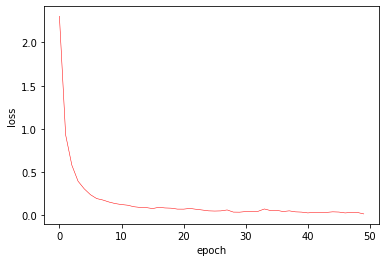

In [19]:
import matplotlib.pyplot as plt


plt.xlabel("epoch")
plt.ylabel("loss")
x = list(range(len(epoch_losses)))
# print(x)
plt.plot(x,epoch_losses,linewidth=0.5,c='red')
plt.show()

In [20]:
apps_dict={}

for i, name in enumerate(apps):
  apps_dict[name] = i

num_label=[]
for app in SAME:
  num_label.append(apps_dict[app])

new_train_g = []
new_train_l = []
for label, graph in zip(test_graph_labels, test_graphs):
  if label in num_label:
    new_train_g.append(graph)
    new_train_l.append(label)

print(len(new_train_g))
print(len(new_train_l))
print(new_train_l[0])

apps_dict_iname = {}
for i, name in enumerate(apps):
  apps_dict_iname[i] = name

x = []
for l in new_train_l:
  x.append(l.item())
print(x)

SAME_dict={}
for i, name in enumerate(SAME):
  SAME_dict[name] = i

print(SAME_dict)

import torch

app_name = []
for l in x:
  app_name.append(apps_dict_iname[l])
print(app_name)

SAME_labels = []
for name in app_name:
  SAME_labels.append(SAME_dict[name])
# set(SAME_labels)
new_test_l = torch.tensor(SAME_labels[:2900])
new_test_g = new_train_g[:2900]


2945
2945
tensor(1)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 

In [21]:
from dgl.data import DGLDataset
from dgl.data.utils import load_graphs

# g, l = load_graphs('sample/train_graphs.bin')

class Testdataset(DGLDataset):
  _url = 'http://deepchem.io.s3-website-us-west-1.amazonaws.com/datasets/qm7b.mat'
  _sha1_str = '4102c744bb9d6fd7b40ac67a300e49cd87e28392'

  def __init__(self, raw_dir=None, force_reload=False, verbose=False):
    super().__init__(name='qm7b',
            url=self._url,
            raw_dir=raw_dir,
            force_reload=force_reload,
            verbose=verbose)

  def process(self):
    # 将数据处理为图列表和标签列表
    self.graphs, self.label = new_test_g, new_test_l
    # self.graphs, self.label = train_graphs, train_graph_labels

  def __getitem__(self, idx):
    """ 通过idx获取对应的图和标签

    Parameters
    ----------
    idx : int
        Item index

    Returns
    -------
    (dgl.DGLGraph, Tensor)
    """
    return self.graphs[idx], self.label[idx]

  def __len__(self):
    """数据集中图的数量"""
    return len(self.graphs)
  
  @property
  def num_labels(self):
    return 17

In [22]:
from dgl.dataloading import GraphDataLoader

dataset1 = Testdataset()
dataloader = GraphDataLoader(
  dataset1,
  batch_size=100,
  drop_last=False,
  shuffle=True)
print(dataset[0])

(Graph(num_nodes=20, num_edges=380,
      ndata_schemes={'attr': Scheme(shape=(63,), dtype=torch.float32)}
      edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)}), tensor(2))


In [23]:
# Test the model
model.eval()  # eval mode(batch norm uses moving mean/variance 
              #instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for batched_graph, labels in dataloader:
        feats = batched_graph.ndata['attr']
        outputs = model(batched_graph, feats)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test accuracy of the model on the 10000 test batched_graph: {} %'
          .format(100 * correct / total))

Test accuracy of the model on the 10000 test batched_graph: 98.27586206896552 %


In [24]:
from sklearn.metrics import classification_report
# Test the model
model.eval()  # eval mode(batch norm uses moving mean/variance 
              #instead of mini-batch mean/variance)
with torch.no_grad():
  pred = []
  true = []
  for batched_graph, labels in dataloader:
      feats = batched_graph.ndata['attr']
      outputs = model(batched_graph, feats)
      _, predicted = torch.max(outputs.data, 1)
      pred.extend(np.array(predicted))
      true.extend(np.array(labels))
  
print(classification_report(true, pred, target_names=SAME))

                 precision    recall  f1-score   support

        zingmp3       0.99      0.96      0.97       259
        fptplay       1.00      1.00      1.00       115
         baomoi       0.97      0.98      0.98       154
         nimotv       1.00      1.00      1.00       166
      messenger       0.98      0.98      0.98       169
           tiki       1.00      0.98      0.99       178
       facebook       0.98      0.98      0.98       189
lienquan_mobile       1.00      0.96      0.98       114
          quora       0.97      0.97      0.97       171
       among_us       1.00      1.00      1.00       159
           azar       0.98      0.98      0.98       180
         tiktok       0.99      0.99      0.99       169
    medoctruyen       0.97      0.97      0.97       147
         weeboo       0.98      0.99      0.98       175
         tinder       0.93      0.99      0.96       175
           hago       0.99      1.00      0.99       203
           bida       0.99    